# Naive Baye's from Scratch

Hello everyone. In this programming tutorial, we will apply our theoretical and mathematical knowledge to write the code for a Naive Baye's classifier from Scratch.

So, let's get started.

### Step-1: Importing Dependencies

So, as usual, the first step is to import all the required dependencies.

So, what are our dependencies here ?? Well, we'll be using:

#### numpy:
for numerical analysis

#### collections.Counter:  
the python's inbuilt library to use a Counter

In [3]:
# Import Dependencies

import numpy as np
from collections import Counter
from IPython.display import Image
%matplotlib inline

### Step-2: Define the Input Dataset

So, the second step is to define the input dataset.

For this tutorial, I'll be using a toy dataset which is as follows:

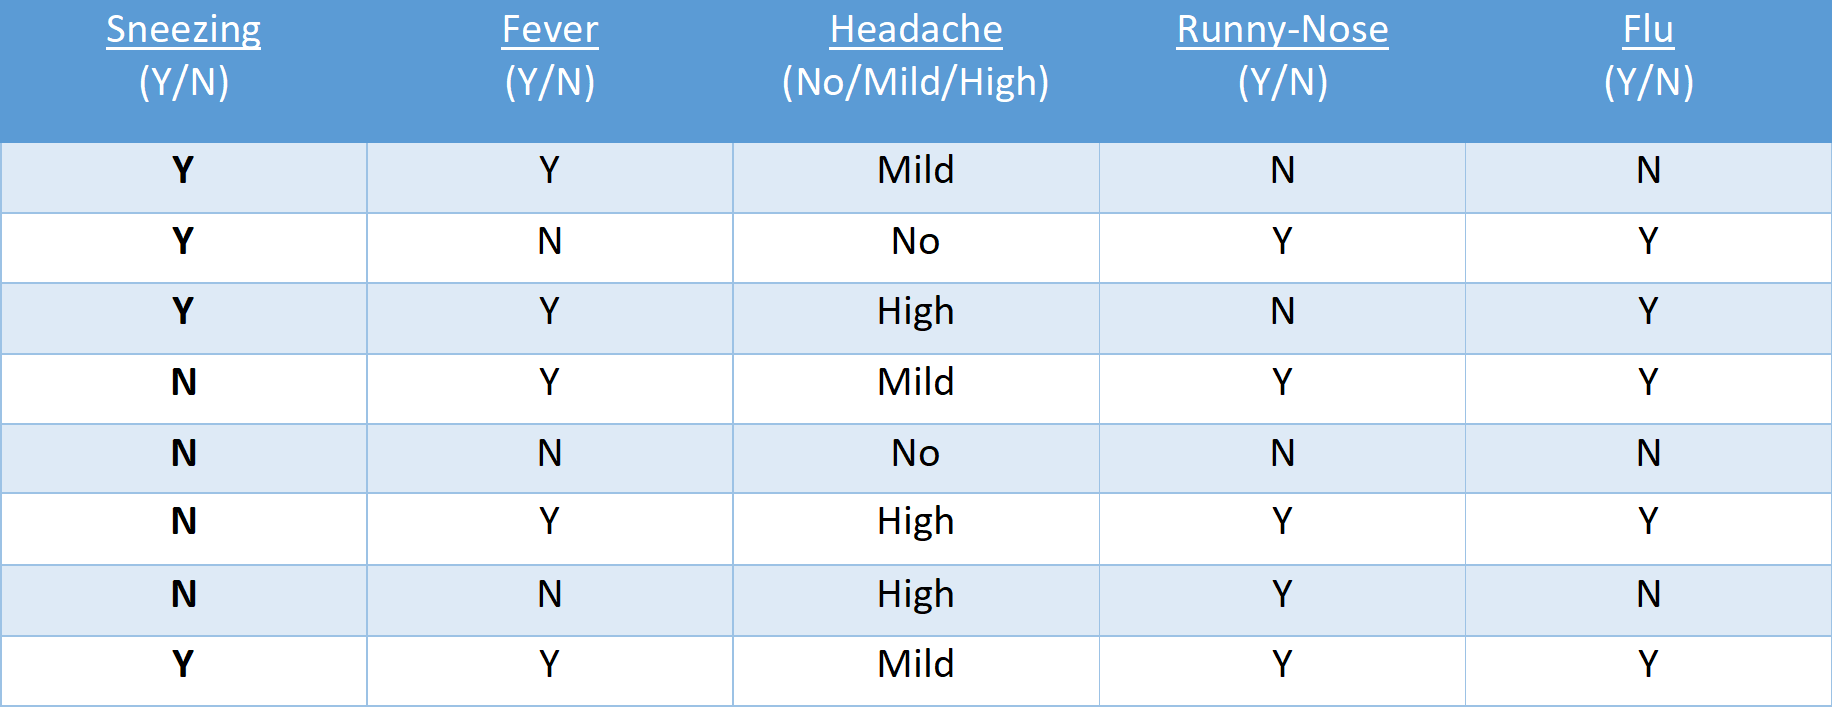

In [13]:
Image(filename= 'C:/PythonProjects/NaiveBayes/toydata.png', width=900)

This dataset describes that whether a person is having a Flu given he/she show these symptoms like headache, sneezing, fever, runny-nose etc.

So, our aim is to write a code for the Naive Bayes's classifier and find out, given the test data points, that whether the person has a Flu or not.

So, let's get started...

Since, to find out probabilities, we would like our data to be a numerical data, so we do some mapping as follows:

For Sneezing, Fever, Runny-Nose, Flu:
Y -> 1
N -> 0

For Headache:
No -> 0
Mild -> 1
High -> 2

In [14]:
# Define the Dataset
# Features: "Sneezing", "Fever", "Headache", "Runny-Nose"
X = np.asarray(((1, 0, 1, 1),
                (1, 1, 0, 0),
                (1, 0, 2, 1),
                (0, 1, 1, 1),
                (0, 0, 0, 0),
                (0, 1, 2, 1),
                (0, 1, 2, 0),
                (1, 1, 1, 1)))

# Labels: "Flu"
y = np.asarray((0, 1, 1, 1, 0, 1, 0, 1))

print('Features X: \n', X)
print('\n Labels y: \n',y)

print('\n Shape of X: ',X.shape)
print('\n Shape of y: ',y.shape)

Features X: 
 [[1 0 1 1]
 [1 1 0 0]
 [1 0 2 1]
 [0 1 1 1]
 [0 0 0 0]
 [0 1 2 1]
 [0 1 2 0]
 [1 1 1 1]]

 Labels y: 
 [0 1 1 1 0 1 0 1]

 Shape of X:  (8, 4)

 Shape of y:  (8,)


### Step-3: Calculating Prior-Probability and Likelihood Probability:

Perfect. Now that we have defined our input dataset, it's now time to write some functions to calculate the Prior and the Likelihood Probabilities. For a review, let's see that what is the equation for the Naive Baye's Classification and what we need to calculate.

The Baye's Theorem looks like this:

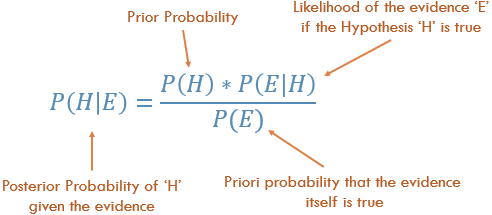

In [15]:
Image(filename= 'C:/PythonProjects/NaiveBayes/bayestheorem.png')

This equation is valid, when we have only one feature. In the above example, we have four features. So, our equation will be modified as follows:

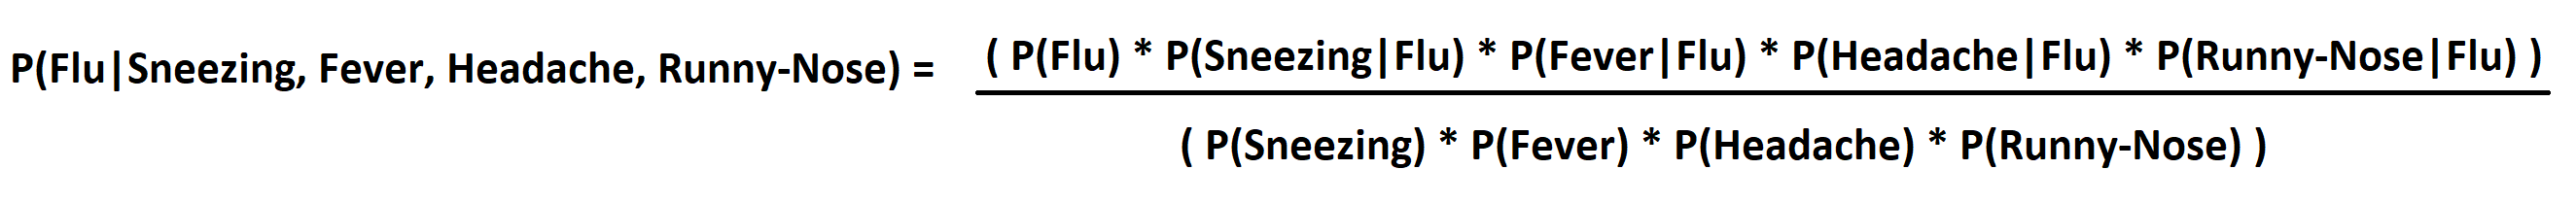

In [16]:
Image(filename= 'C:/PythonProjects/NaiveBayes/naivebayes.png')

So, for this problem, we need to figure out the values in the Numerator and Denominator of this equation and find out the probability. So, let's get started.

### NOTE: 

For this tutorial, we take the test data to be as follows:

x = [1,0,1,0] i.e.

#### Sneezing: Y, 

#### Fever: N, 

#### Headache: Y, 

#### Runny-Nose: N

So, our aim is to find out if the person has a flu given these symptoms.

1. Firstly, let's define the Prior Probability function.

In [19]:
# Prior Probability: "P(Flu)"
def prior_probb(classes):
    tot = len(classes)
    prob = dict(Counter(classes))
    print('Instances of each Class: ',prob)
    for key in prob.keys():
        prob[key] = prob[key]/tot
    return prob

So, what are we doing in the above code ?? We are trying to calculate the Probability of "Flu". How do we do that. In simple mathematics, probability of Flu = 1 is calculated as total number of instances of "1" in the array "y" that represents our class labels and divide by the total number of elements in the array "y".

So, what we get is:

P(Flu = 1) = 5/8

P(Flu = 0) = 3/8

This is what the above code gives us in the form of a dictionary as:

{'0': 3/8, '1': 5/8}

Let's test it out...

In [20]:
prior_probabilities = prior_probb(y)
print('Prior Probabilities: ',prior_probabilities)

Instances of each Class:  {0: 3, 1: 5}
Prior Probabilities:  {0: 0.375, 1: 0.625}


So, we are done with the Prior Probabiliy. Next, let's write a function to calculate the Likelihood Probabilities.

In [25]:
# Function to Count the Number of Instances of each Class
y_count = []
for val in Counter(y).values():
    y_count.append(val)
    

# Likelihood Probability Numerator Calculation
def p_X_given_y(X,col,y_n):
    x = X[:, col]
    tot1 = 0
    for i in range(len(x)):
        if (x[i] == y_n) and (y[i] == 1):
            tot1 += 1
    return tot1


# Likelihood Probability: P(E|H)
def likelihood(X,i,yes_no):
    tot1 = 0
    tot1 = p_X_given_y(X,col=i,y_n=yes_no)
    return (tot1 / float(y_count[1]))

So, what is going up in the above code ?? Well as we can see in the equation for the Naive Bayes, we need to find the Likelihood Probability for each feature in our dataset. So, isn't it better to write a single function that can do it all rather that calculating them seperately !!! Well yes, ofcourse.

The above function does exactly that. We find the Likelihood Probabilities for Flu = 1 and different values of features i.e. "0" or "1" for each feature. But why ?? Well, if you see the test data, it has the features like this x = [1,0,1,0] where each feature is not a "1" or a "0" but they can come in any combinations. So, it's better to just keep the value as general so that it works for all cases.

Now, how do we calculate the Likelihood probability ?? Let us calculate some values theoretically and verify them using the code.

##### P(Sneezing = Y | Flu = Y) = 3/5 => 0.6

##### P(Fever = N | Flu = Y) = 1/5 => 0.2

##### P(Headache = mild | Flu = Y) = 2/5 => 0.4

##### P(Runny-Nose = N | Flu = Y) = 1/5 => 0.2

If you are thinking that where these values cam from, let me take you through the calculation for on of these and the rest go on the same.

So, to calculate "Probability of Sneezing = Y given Flu = Y", just count the number of times yes appears in both Sneezing and the Flu columns at same index. THis value becomes your numerator. Now count that how many number of times the Flu = Y appears in the Flu column. This becomes your denominator.

### Step-4: Putting together the Classifier

Now that we have defined our functions, let's put all things together and make our classification.

In [29]:
# Calculate Likelihood Probability for each Test Case
a = []
yesNo = [1,0,1,0]
for i in range(X.shape[1]):
    p_yes = likelihood(X,i,yes_no=yesNo[i])
    a.append(p_yes)
    print('P(H=Yes/No|Flu=Yes) = ', p_yes)

print('\nLikelihood Probabilities: ',a)

P(H=Yes/No|Flu=Yes) =  0.6
P(H=Yes/No|Flu=Yes) =  0.2
P(H=Yes/No|Flu=Yes) =  0.4
P(H=Yes/No|Flu=Yes) =  0.2

Likelihood Probabilities:  [0.6, 0.2, 0.4, 0.2]


The above code inputs the test data and calls our Likelihood function which in turn returns the Likelihood Probabilities for each feature. 

Note that, the values obtained from the above function and as calculated in the theory above are exactly the same which proves our theory.

Next, let us calculate our Priori Probability values from the function defined above for each feature i.e. the denominator values.

##### P(Sneezing = Y) = 4/8 => 0.50
##### P(Sneezing = N) = 4/8 => 0.50   or [ 1 - P(Sneezing = Y) ]

##### P(Fever = Y) = 5/8 => 0.62
##### P(Fever = N) = 3/8 => 0.375  or  [ 1 - P(Fever = Y) ]

##### P(Headache = No) = 2/8 => 0.25
##### P(Headache = Mild) = 3/8 => 0.375
##### P(Headache = High) = 3/8 => 0.375

##### P(Runny-Nose = Y) = 5/8 => 0.625
##### P(Runny-Nose = N) = 3/8 => 0.375  or  [ 1 - P(Runny-Nose = Y) ]

Now, let's verify these values using our prior_probb function that we wrote above.

In [32]:
# Calculate the Priori Probabilities [Denominator]
b = []
for i in range(X.shape[1]):
    x = X[:, i]
    probb = prior_probb(x)
    b.append(probb)
    
print('\nPriori Probabilities: ',b)

Instances of each Class:  {1: 4, 0: 4}
Instances of each Class:  {0: 3, 1: 5}
Instances of each Class:  {1: 3, 0: 2, 2: 3}
Instances of each Class:  {1: 5, 0: 3}

Priori Probabilities:  [{1: 0.5, 0: 0.5}, {0: 0.375, 1: 0.625}, {1: 0.375, 0: 0.25, 2: 0.375}, {1: 0.625, 0: 0.375}]


So, the values obtained above verify our values calculated theoretically. Now, from these Priori Probabilities, we only require the probability for the test values only. So, let's get those values.

In [34]:
# Getting the Priori Probabilities corresponding to Test Input
# Denominator

b_prod = []
P_sneezing = b[0][1]
b_prod.append(P_sneezing)
print('P(Sneezing = Y/1): ',P_sneezing)

P_fever = b[1][0]
b_prod.append(P_fever)
print('\nP(Fever = N/0): ',P_fever)

P_headache = b[2][1]
b_prod.append(P_headache)
print('\nP(Headache = Y/1): ',P_headache)

P_runny_nose = b[3][0]
b_prod.append(P_runny_nose)
print('\nP(Runny-Nose = N/0): ',P_runny_nose)

P(Sneezing = Y/1):  0.5

P(Fever = N/0):  0.375

P(Headache = Y/1):  0.375

P(Runny-Nose = N/0):  0.375


So, now we have the values for the Numerator [Likelihood Probabilities], the Denominaotr [Priori Probabilities] and the Prior Probability [P(Flu)].

The only step left now is to put them into one single equation and calculate the product. So, let's do it.

In [35]:
# Numerator
print('Likelihood Probability Product: ',np.product(a))

# Denominator
print('Priori Probability Product: ',np.product(b_prod))

Likelihood Probability Product:  0.0096
Priori Probability Product:  0.0263671875


In [43]:
# Probability of FLu= Yes given Symptoms: Sneezing= Yes, Fever=No, Headache=Yes, Runny-Nose=No
probb_flu_yes = float(prior_probabilities[1] * np.product(a))/(float(np.product(b_prod)))
print('P(Flu=Y|Sneezing= Yes, Fever=No, Headache=Yes, Runny-Nose=No): ',probb_flu_yes)

P(Flu=Y|Sneezing= Yes, Fever=No, Headache=Yes, Runny-Nose=No):  0.22755555555555557


So, this shows that the probability of a person having a Flu given the symptoms "Sneezing: Yes", "Fever: No", "Headache: Yes" and "Runny-Nose: No" is only 22.75% which is pretty low and tells us that that person is not having a Flu.

### Thanks for reading this tutorial. Please feel free to post any suggestions, comments, mistakes etc. below. Please note that there are much more efficient ways to write this code but I have tried to keep it as simple as possible so that anyone can understand the working behind this algorithm.